In [34]:
from pyforest import *

In [35]:
# import dataset without foreign schools
df = pd.read_csv(r'/Users/dillorr/defaultRate/dillon/defaultRate/data/modeling/combined.csv', encoding = "ISO-8859-1")

<IPython.core.display.Javascript object>

## predict proprietary school

###  Train Test Split

In [36]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the prop column as the feature to be predicted (y)
y = df['proprietary']

# Remove the prop column to create the training data
X = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log']]
# X = df.drop('proprietary', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

train = pd.concat([y_train, X_train], axis = 1)
test = pd.concat([y_test, X_test], axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# # export training and test
# train.to_csv('/Users/dillorr/defaultRate/dillon/defaultRate/data/modeling/train.csv', index=False)
# test.to_csv('/Users/dillorr/defaultRate/dillon/defaultRate/data/modeling/test.csv', index=False)

In [38]:
train.columns

Index(['proprietary', 'associates', 'cdr2015_log', 'density_log',
       'educationcollegeorabove', 'private', 'proglength', 'public',
       'raceasian_log', 'rentmedian_log'],
      dtype='object')

In [39]:
import sklearn.linear_model as lm

log = lm.LogisticRegression(max_iter = 200).fit(X_train, y_train)

# View model summary
print(log.score(X_train, y_train))

1.0


### training set

In [40]:
pred_lm = log.predict(X_train)

# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_pred = np.where(pred_lm > cutoff, 1, 0)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y_train, y_pred,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_train, y_pred))

print("precision:",metrics.precision_score(y_train, y_pred))

print("recall:",metrics.recall_score(y_train, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_train, y_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0    1   All
Actual                    
0          1835    0  1835
1             0  858   858
All        1835  858  2693
accuracy:  1.0
precision: 1.0
recall: 1.0
kappa: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

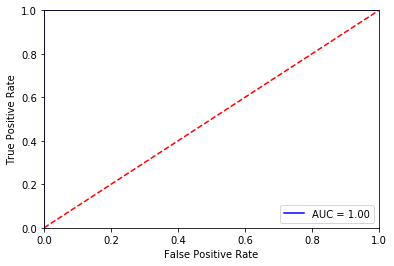

In [41]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### test set

In [42]:
pred_lm = log.predict(X_test)

# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_pred = np.where(pred_lm > cutoff, 1, 0)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y_test, y_pred,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

print("precision:",metrics.precision_score(y_test, y_pred))

print("recall:",metrics.recall_score(y_test, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_test, y_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix
Predicted    0    1  All
Actual                  
0          606    0  606
1            0  292  292
All        606  292  898
accuracy:  1.0
precision: 1.0
recall: 1.0
kappa: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

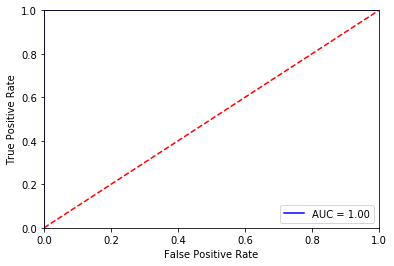

In [43]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### cross validation

In [44]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y = df.proprietary
model = log

scores = cross_val_score(model, df, y, cv=6)
print(scores)

predictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, predictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, predictions))

print("precision:",metrics.precision_score(y, predictions))

print("recall:",metrics.recall_score(y, predictions))

print("kappa:",metrics.cohen_kappa_score(y, predictions))

[1.         1.         1.         1.         1.         0.72408027]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          2276   165  2441
1             0  1150  1150
All        2276  1315  3591
accuracy:  0.9540517961570593
precision: 0.8745247148288974
recall: 1.0
kappa: 0.8983210964226235


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

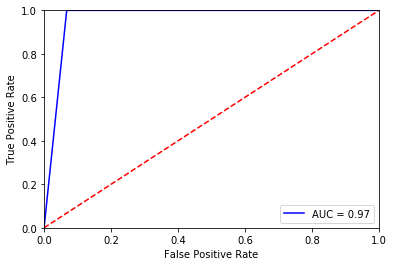

0.966202376075379


In [45]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)

## predict high cdr

In [46]:
df['cdrHigh'] = [1 if x >= 0.536775872 else 0 for x in df.cdr2016_log]

In [47]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the opeid column as the feature to be predicted (y)
y = df['cdrHigh']

# Remove the opeid column to create the training data
data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log', 'proprietary']]
#X = df.drop('cdrHigh', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

train = pd.concat([y_train, X_train], axis = 1)
test = pd.concat([y_test, X_test], axis = 1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
import sklearn.linear_model as lm

log = lm.LogisticRegression(max_iter = 200).fit(X_train, y_train)

# View model summary
print(log.score(X_train, y_train))

0.8718900854066097


In [49]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y = df.proprietary
model = log

scores = cross_val_score(model, df, y, cv=6)
print(scores)

predictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, predictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, predictions))

print("precision:",metrics.precision_score(y, predictions))

print("recall:",metrics.recall_score(y, predictions))

print("kappa:",metrics.cohen_kappa_score(y, predictions))

[1.         0.71786311 1.         1.         1.         0.69063545]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          2256   185  2441
1           169   981  1150
All        2425  1166  3591
accuracy:  0.9014202172096909
precision: 0.8413379073756432
recall: 0.8530434782608696
kappa: 0.7744056918989253


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

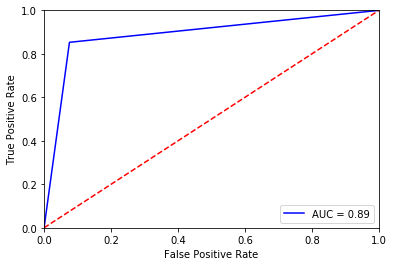

0.888627433517981


In [50]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)